# Naive Bayes

In [22]:
import pandas as pd
import pickle
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [5]:
#carregando base
base_risco_credito = pd.read_csv('../datasets/risco_credito.csv')

In [6]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


# separação entre previsores e classe

In [7]:
# previsores 
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [8]:
# classe
Y_risco_credito = base_risco_credito.iloc[:, -1]
Y_risco_credito

0         alto
1         alto
2     moderado
3         alto
4        baixo
5        baixo
6         alto
7     moderado
8        baixo
9        baixo
10        alto
11    moderado
12       baixo
13        alto
Name: risco, dtype: object

In [9]:
# aplicando label encoder para transformar os categóricos em numéricos
# é necessário um labelencoder para cada atributo categórico
from sklearn.preprocessing import LabelEncoder
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()

In [10]:
X_risco_credito[:, 0] = label_enconder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_enconder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_enconder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_enconder_renda.fit_transform(X_risco_credito[:, 3])

In [11]:
# verificando resultado
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [12]:
with open('../datasets/processed/risco_credito.pkl', mode='wb') as f:
    pickle.dump([X_risco_credito, Y_risco_credito], f)

In [13]:
#criando algoritmo e gerando tabela de probabilidade
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, Y_risco_credito)

,priors,None
,var_smoothing,1e-09


In [ ]:
# gerando previsão 
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2) : resultado correto : baixo
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0) : resultado correto : moderado
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [15]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
# checando classes do algoritmo
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
# contando os registros de cada classe
naive_risco_credito.class_count_

array([6., 5., 3.])

In [20]:
# observando as probabilidades a priori
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

# Aplicando Algoritmo de Árvore de Decisão

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:

# Carregando dados processados
with open('../datasets/processed/risco_credito.pkl', mode='rb') as f:
    X_risco_credito, Y_risco_credito = pickle.load (f)

In [12]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [13]:
Y_risco_credito

0         alto
1         alto
2     moderado
3         alto
4        baixo
5        baixo
6         alto
7     moderado
8        baixo
9        baixo
10        alto
11    moderado
12       baixo
13        alto
Name: risco, dtype: object

In [14]:
# criando a arvore e fazendo treinamento
arvore_risco_credito = DecisionTreeClassifier(criterion = 'entropy')
arvore_risco_credito.fit(X_risco_credito, Y_risco_credito)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# verificando a importancia dos atributos com base no calculo da entropia e do ganho de informação
arvore_risco_credito.feature_importances_

array([0.41607015, 0.06408636, 0.03885431, 0.48098917])

[Text(0.6363636363636364, 0.9166666666666666, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.45454545454545453, 0.75, 'história <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.5454545454545454, 0.8333333333333333, 'True  '),
 Text(0.36363636363636365, 0.5833333333333334, 'dívida <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2727272727272727, 0.4166666666666667, 'história <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.18181818181818182, 0.25, 'renda <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(0.09090909090909091, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.2727272727272727, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.36363636363636365, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.45

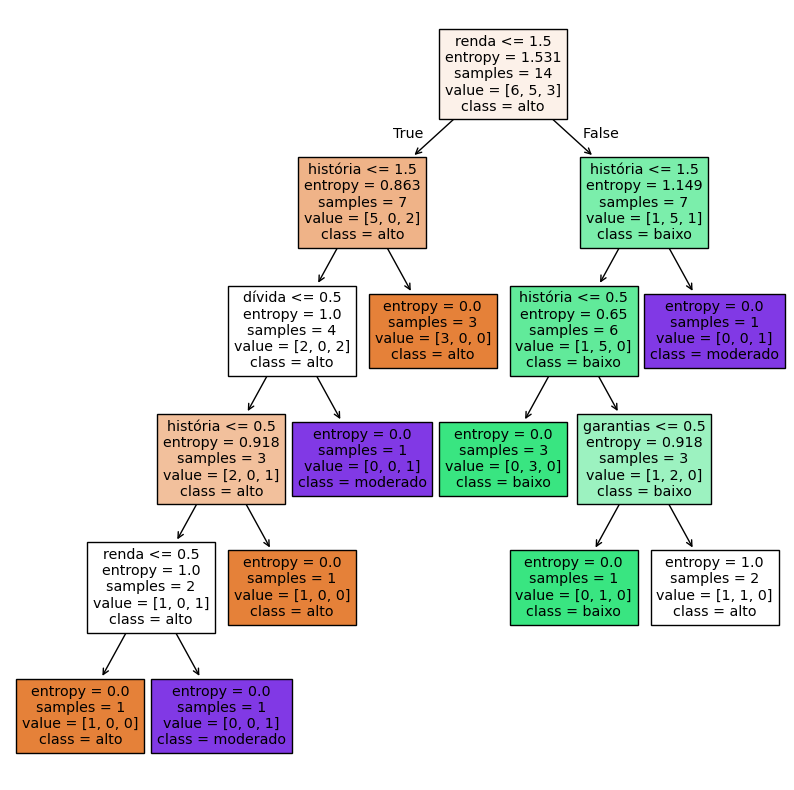

In [25]:
# visualizando arvore de decisão
from sklearn import tree
previsores =  ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows = 1, ncols=1, figsize=(10, 10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True)

In [27]:
# gerando previsão 
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2) : resultado correto : baixo
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0) : resultado correto : moderado
previsao = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'alto'], dtype=object)

# Aprendizado por regras

In [14]:
import Orange

In [ ]:
# Carregando dados, precisamos da base no formato do orange por isso não usaremos pandas
# leitura direta do arquivo csv
# carregando uma versão atualizada da basico risco credito adicionando a notação c# no atributo classe para o orange interpretá-lo como tal
# esse algoritmo consegue trabalhar com atributos categoricos, ou seja, não hça necessidade de usar nenhum tipo de encoder
base_risco_credito = Orange.data.Table('../datasets/risco_credito_regras.csv')

In [16]:
# com a notação c# ele dive os atributos entre classe e previsores
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [17]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [ ]:
# criando o algoritmo
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

# com isso as regras foram criadas 

In [19]:
# checando regras criadas
for regras in regras_risco_credito.rule_list:
    print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=alto 
IF TRUE THEN risco=alto 


In [21]:
# simulando classificação de 2 registros
# história boa , dívida alta , garantias nenhuma , renda > 35 : resultado correto : baixo
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0) : resultado correto : moderado
previsoes  = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta','adequada','0_15']])
previsoes

array([1, 0])

In [26]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [ ]:
for i in previsoes:
    print(base_risco_credito.domain.class_var.values[i])

baixo
alto


# Reegressão logística

In [13]:
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
# carregando dados processados
with open('../datasets/processed/risco_credito.pkl', 'rb') as f:
    X_risco_credito, Y_risco_credito = pickle.load(f)

In [7]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [8]:
Y_risco_credito

0         alto
1         alto
2     moderado
3         alto
4        baixo
5        baixo
6         alto
7     moderado
8        baixo
9        baixo
10        alto
11    moderado
12       baixo
13        alto
Name: risco, dtype: object

In [10]:
# Vamos apagar os registros da classe moderado para a prática ficar de acordo com a aula teórica
# que apenas usou 2 tipos de classe(alto e baixo)
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0)
Y_risco_credito = np.delete(Y_risco_credito, [2, 7, 11], axis = 0)

In [11]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [12]:
Y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [14]:
# fazendo treinamento
logistic_risco_credito = LogisticRegression(random_state=1)
logistic_risco_credito.fit(X_risco_credito, Y_risco_credito)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# parametro b0
logistic_risco_credito.intercept_

array([-0.80855152])

In [ ]:
# coeficientes (um valor para cada um dos atributos previsores)
logistic_risco_credito.coef_

array([[-0.76706797,  0.23921064, -0.47989768,  1.12196145]])

In [17]:
# simulando classificação de 2 registros
# história boa , dívida alta , garantias nenhuma , renda > 35 : resultado correto : baixo
# história ruim , dívida alta , garantias adequada , renda < 15  : resultado correto : moderado
previsoes1  = logistic_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes1  

array(['baixo', 'alto'], dtype=object)